In [21]:
# score 62.18

In [ ]:
pip install category_encoders

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.cluster import KMeans

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier

## Data preprocessing

In [2]:
df = pd.read_csv('credit_data_train.csv')
df['other_debt_obligations'].fillna('no', inplace = True)

# drop null value
df.dropna(inplace = True)

# drop duplicates
df.drop_duplicates(inplace = True)

#drop outliers
df.drop(df[df['age'] == 131].index, inplace = True)
df.drop(df[df['loan_value']>19000].index, inplace = True)

#reset index
df.reset_index(drop = True, inplace = True)


In [3]:
# bucket loan_duration
lduration_bucket = [0,10,25,40,75]
lduration_name = ['0-10','11-25','26-40','41-75']

df['lduration_bucket'] = pd.cut(df['loan_duration'], 
                                bins = lduration_bucket,
                                labels = lduration_name,
                                include_lowest= True)

# bucket loan_value
lvalue_bucket = [200,1500,3000,5000,60000]
lvalue_name = ['200-1500','1501-3000','3001-5000','5001-60000']

df['lvalue_bucket'] = pd.cut(df['loan_value'], 
                                bins = lvalue_bucket,
                                labels = lvalue_name,
                                include_lowest= True)

# bucket age
age_bucket = [19,30,50,131]
age_name = ['19-30','31-50','51-131']

df['age_bucket'] = pd.cut(df['age'], 
                                bins = age_bucket,
                                labels = age_name,
                                include_lowest= True)

In [4]:
df_new= df.drop(['loan_duration','loan_value','age'], axis= 1)
x = df_new.drop('class', axis = 1)
x= x.astype(object)
y = df_new[['class']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [70]:
X_train.columns

Index(['sex', 'marital_status', 'current_account_balance', 'credit_history',
       'loan_purpose', 'savings_account_balance', 'length_of_employment',
       'instalment_rate', 'debtor_status', 'length_of_residence',
       'most_valuable_asset', 'other_debt_obligations', 'home_ownership',
       'existing_credits', 'employment', 'num_dependants', 'citizenship',
       'lduration_bucket', 'lvalue_bucket', 'age_bucket'],
      dtype='object')

In [6]:
cols = list[X_train.columns]
for col in cols:
    te = TargetEncoder()
    te.fit(X = X_train[col], y = y_train)
    values = te.transform(X_train[col])
    x_new = pd.concat([X_train,values], axis = 1)
    

In [7]:
df_2= x_new.iloc[:, 20:]

In [8]:
merged_data = df_2.merge(y,right_index = True, left_index = True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 434 to 684
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      628 non-null    float64
 1   marital_status           628 non-null    float64
 2   current_account_balance  628 non-null    float64
 3   credit_history           628 non-null    float64
 4   loan_purpose             628 non-null    float64
 5   savings_account_balance  628 non-null    float64
 6   length_of_employment     628 non-null    float64
 7   instalment_rate          628 non-null    float64
 8   debtor_status            628 non-null    float64
 9   length_of_residence      628 non-null    float64
 10  most_valuable_asset      628 non-null    float64
 11  other_debt_obligations   628 non-null    float64
 12  home_ownership           628 non-null    float64
 13  existing_credits         628 non-null    float64
 14  employment               628 

<Axes: >

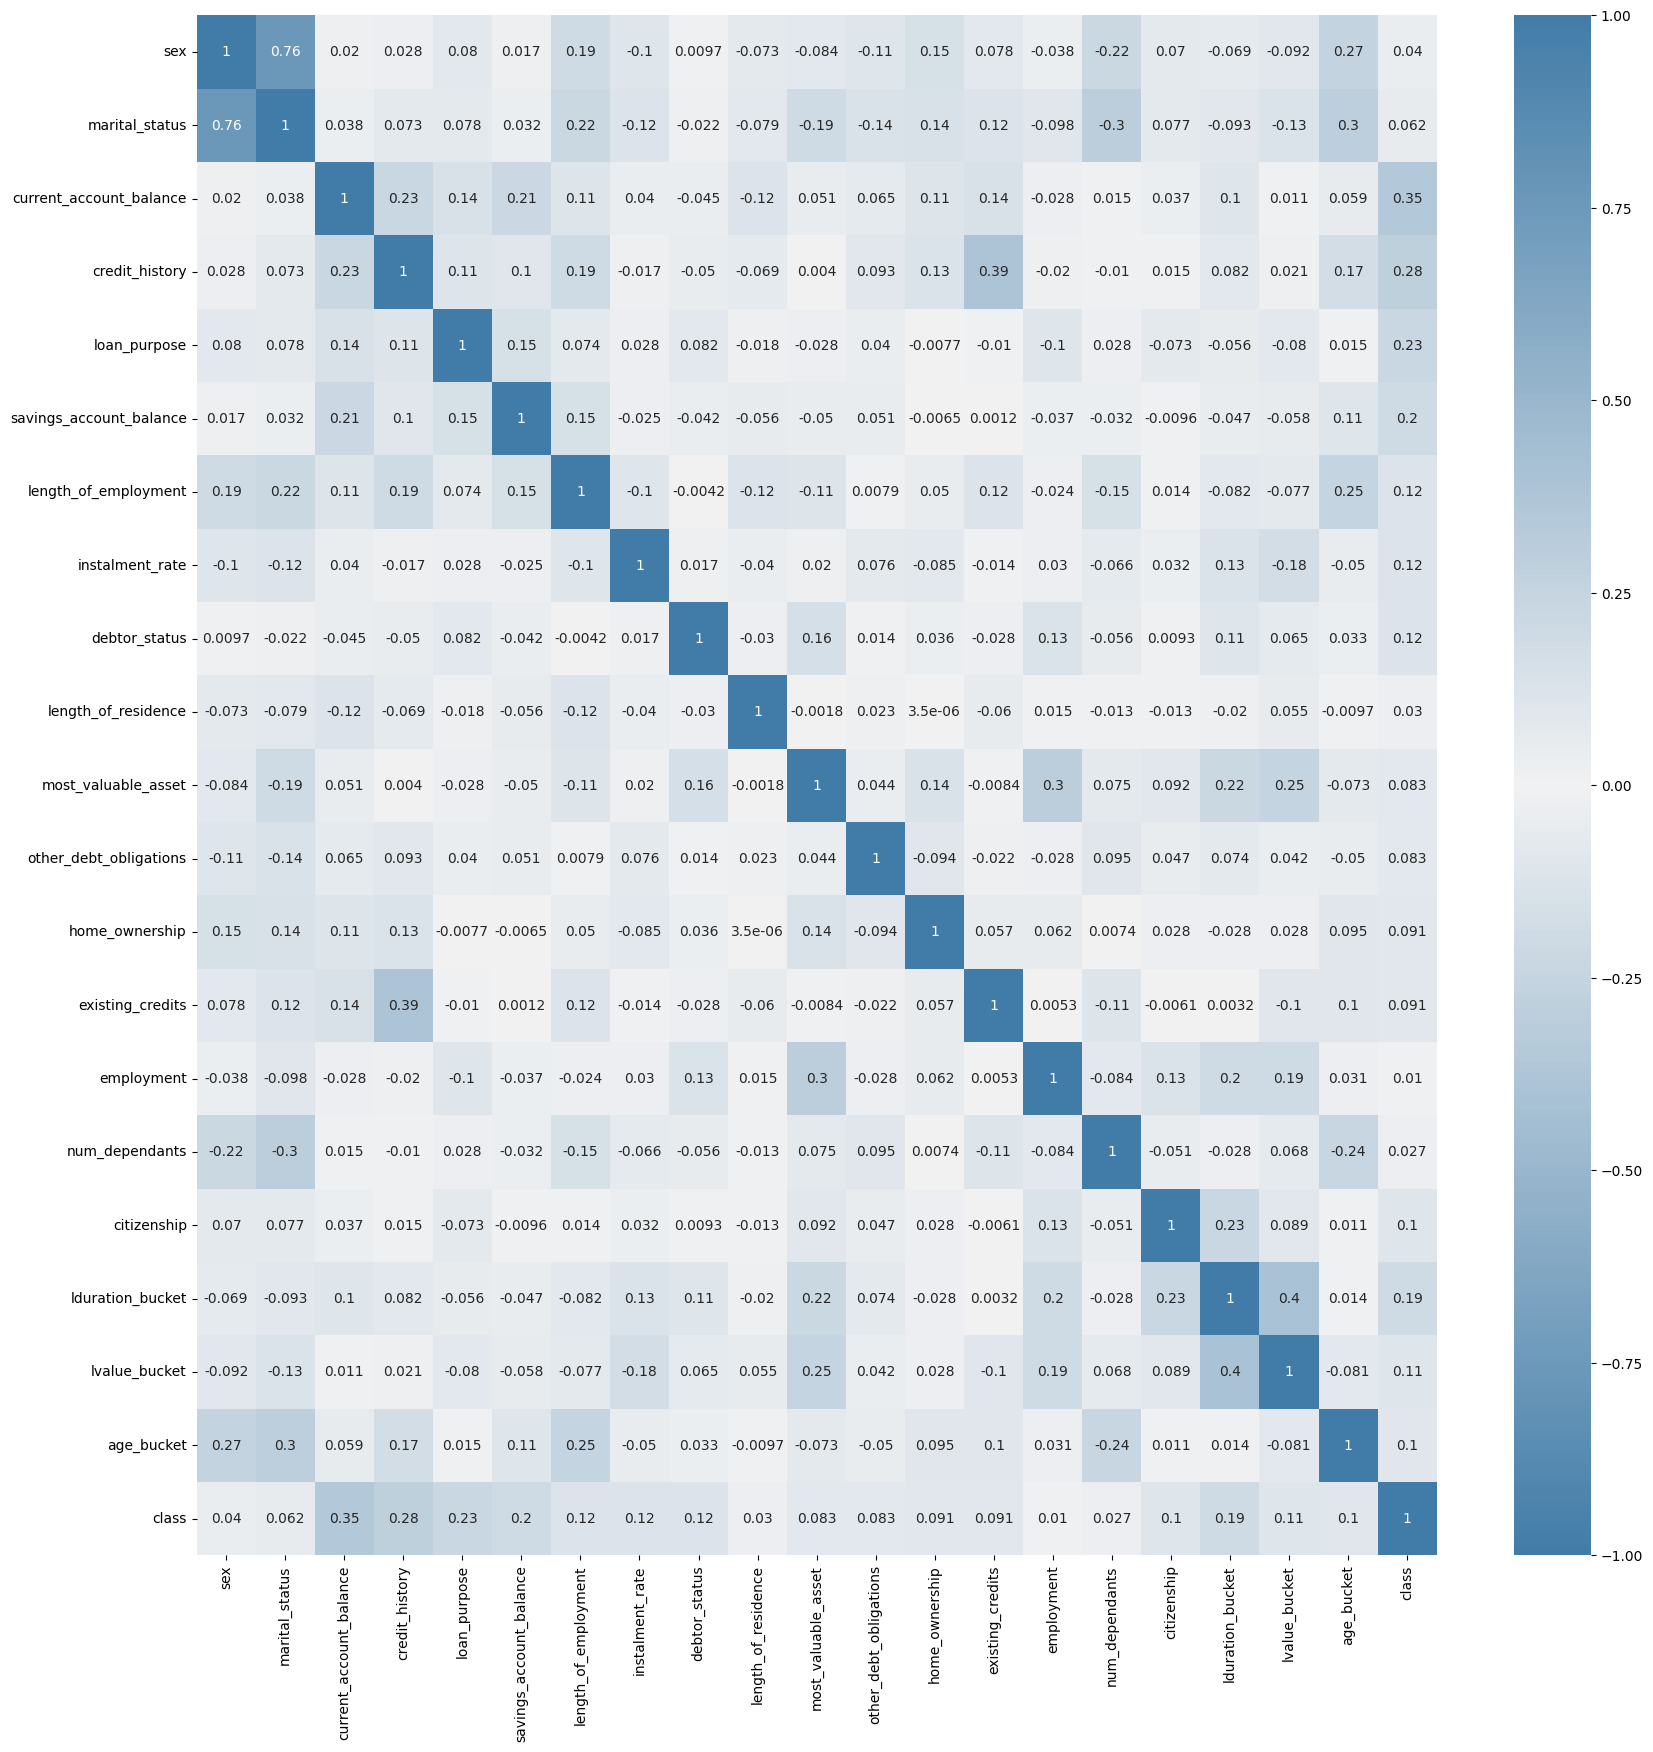

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(merged_data.corr(),
           annot = True,
           linecolor = 'black',
           center = 0,
           vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(600,600, as_cmap = True))

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df_2, y_train)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_2.columns
mutual_info.sort_values(ascending = False)

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_nine_cols = SelectKBest(mutual_info_classif, k=14)
sel_nine_cols.fit(df_2,y_train)
df_2.columns[sel_nine_cols.get_support()]

In [10]:
df_fitured = df_2[[ 'sex', 'current_account_balance', 'credit_history',
       'loan_purpose', 'savings_account_balance',
       'instalment_rate', 'debtor_status', 
       'most_valuable_asset', 'home_ownership',
       'existing_credits', 'num_dependants',
       'lduration_bucket', 'lvalue_bucket', 'age_bucket']]


In [11]:
# scale
scaler = StandardScaler()
scaler.fit(df_fitured)
X_scaled = scaler.transform(df_fitured)

In [12]:
sex_means = df.groupby('sex')['class'].mean().to_dict()
current_account_balance_means = df.groupby('current_account_balance')['class'].mean().to_dict()
credit_history_means = df.groupby('credit_history')['class'].mean().to_dict()
loan_purpose_means = df.groupby('loan_purpose')['class'].mean().to_dict()
savings_account_balance_means = df.groupby('savings_account_balance')['class'].mean().to_dict()
instalment_rate_means = df.groupby('instalment_rate')['class'].mean().to_dict()
debtor_status_means = df.groupby('debtor_status')['class'].mean().to_dict()
most_valuable_asset_means = df.groupby('most_valuable_asset')['class'].mean().to_dict()
home_ownership_means = df.groupby('home_ownership')['class'].mean().to_dict()
existing_credits_means = df.groupby('existing_credits')['class'].mean().to_dict()
num_dependants_means = df.groupby('num_dependants')['class'].mean().to_dict()
lduration_bucket_means = df.groupby('lduration_bucket')['class'].mean().to_dict()
lvalue_bucket_means = df.groupby('lvalue_bucket')['class'].mean().to_dict()
age_bucket_means = df.groupby('age_bucket')['class'].mean().to_dict()

/var/folders/nj/s66b_n5d2nb6dsv5r0lvh25h0000gn/T/ipykernel_6838/3255451656.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lduration_bucket_means = df.groupby('lduration_bucket')['class'].mean().to_dict()
/var/folders/nj/s66b_n5d2nb6dsv5r0lvh25h0000gn/T/ipykernel_6838/3255451656.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lvalue_bucket_means = df.groupby('lvalue_bucket')['class'].mean().to_dict()
/var/folders/nj/s66b_n5d2nb6dsv5r0lvh25h0000gn/T/ipykernel_6838/3255451656.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pa

In [13]:
df_test = pd.read_csv('credit_data_test.csv').set_index('id')
df_test['other_debt_obligations'].fillna('no', inplace = True)

In [14]:
# bucket loan_duration
lduration_bucket = [0,10,25,40,75]
lduration_name = ['0-10','11-25','26-40','41-75']

df_test['lduration_bucket'] = pd.cut(df_test['loan_duration'], 
                                bins = lduration_bucket,
                                labels = lduration_name,
                                include_lowest= True)

# bucket loan_value
lvalue_bucket = [200,1500,3000,5000,60000]
lvalue_name = ['200-1500','1501-3000','3001-5000','5001-60000']

df_test['lvalue_bucket'] = pd.cut(df_test['loan_value'], 
                                bins = lvalue_bucket,
                                labels = lvalue_name,
                                include_lowest= True)

# bucket age
age_bucket = [19,30,50,131]
age_name = ['19-30','31-50','51-131']

df_test['age_bucket'] = pd.cut(df_test['age'], 
                                bins = age_bucket,
                                labels = age_name,
                                include_lowest= True)

In [15]:
feature_cols = ['sex', 'current_account_balance', 'credit_history',
       'loan_purpose', 'savings_account_balance',
       'instalment_rate', 'debtor_status', 
       'most_valuable_asset', 'home_ownership',
       'existing_credits', 'num_dependants',
       'lduration_bucket', 'lvalue_bucket', 'age_bucket']

In [16]:
df_test['sex'] = df_test['sex'].map(sex_means)
df_test['current_account_balance'] = df_test['current_account_balance'].map(current_account_balance_means)
df_test['credit_history'] = df_test['credit_history'].map(credit_history_means)
df_test['loan_purpose'] = df_test['loan_purpose'].map(loan_purpose_means)
df_test['savings_account_balance'] = df_test['savings_account_balance'].map(savings_account_balance_means)
df_test['instalment_rate'] = df_test['instalment_rate'].map(instalment_rate_means)
df_test['debtor_status'] = df_test['debtor_status'].map(debtor_status_means)
df_test['most_valuable_asset'] = df_test['most_valuable_asset'].map(most_valuable_asset_means)
df_test['home_ownership'] = df_test['home_ownership'].map(home_ownership_means)

df_test['existing_credits'] = df_test['existing_credits'].map(existing_credits_means)
df_test['num_dependants'] = df_test['num_dependants'].map(num_dependants_means)
df_test['lduration_bucket'] = df_test['lduration_bucket'].map(lduration_bucket_means)
df_test['lvalue_bucket'] = df_test['lvalue_bucket'].map(lvalue_bucket_means)
df_test['age_bucket'] = df_test['age_bucket'].map(age_bucket_means)

In [17]:
df_test = df_test[feature_cols]


In [18]:
scaler = StandardScaler()
scaler.fit(df_test)
X_test_scaled = scaler.transform(df_test)

In [19]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_scaled, y_train)

predicted_rf = rf_classifier.predict(X_test_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
df_result= pd.DataFrame(predicted_rf)
df_result= df_result.reset_index()
df_result = df_result.set_axis(['id','class'], axis = 1)
df_result.to_csv('no_outliers_bucket_randomfst.csv', encoding = 'utf-8', index = False)

In [ ]:
# GradientBoostingClassifier
#gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
#gb_classifier.fit(X_scaled, y_train)

#predicted_gb = gb_classifier.predict(X_test_scaled)

In [ ]:
#df_result= pd.DataFrame(predicted_gb)
#df_result= df_result.reset_index()
#df_result = df_result.set_axis(['id','class'], axis = 1)
#df_result.to_csv('test_result_gb.csv', encoding = 'utf-8', index = False)